In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In the beginning I have imported all the libraries that I need (seaborn and matplotlib for visualizing).

In [ ]:
# Importing the dataset
dataset = pd.read_csv('StartUpProfits.csv',index_col = None)
#Convert the column into categorical columns
#dataset['State'] = dataset['State'].replace(to_replace ="California", value =1)
#dataset['State'] = dataset['State'].replace(to_replace ="New York", value =2)
#dataset['State'] = dataset['State'].replace(to_replace ="Florida", value =3)
le=LabelEncoder()
dataset['State']=le.fit_transform(dataset.State)
cnt=0
sum=0
for i in dataset['Marketing Spend']:
  if int(i)==0 or int(i)//1 == 0:
    cnt+=1
  else:
    sum+=i
print("There is %d missing values in Marketing Spend" %cnt)

if cnt>0:
  mean = dataset["Marketing Spend"].mean() 
  dataset['Marketing Spend'] = dataset['Marketing Spend'].replace(to_replace=0,value=mean )    
cnt1=0
sum1=0
for i in dataset['R&D Spend']:
  if i==0 or i//1 == 0:
    cnt1+=1
  else:
    sum1+=i
print("Thereis %d missing values in R&D Spend" %cnt1)
if cnt1>0:
  mean = dataset["R&D Spend"].mean()
  dataset['R&D Spend'] = dataset['R&D Spend'].replace(to_replace=0,value=mean )
cnt2=0
sum2=0
for i in dataset['Administration']:
  if i==0 or i//1 == 0:
    cnt2+=1
  else:
    sum2+=i
print("Thereis %d missing values in Administration" %cnt2)
if cnt2>0:
  mean = dataset.Administration.mean()    
  dataset['Administration'] = dataset['Administration'].replace(to_replace=0,value=mean )
cnt3=0
sum3=0
for i in dataset['Profit']:
    if float(i)==0 or float(i)//1 == 0:
      cnt3+=1
    else:
      sum3+=float(i)
print("Thereis %d missing values in Profit" %cnt3)
if cnt3>0:
  mean = dataset["profit"].mean()
  if cnt3 == 1:    
    dataset['Profit'] = dataset['Profit'].replace(to_replace=mis,value=mean )
  else:
    for i in mis:
      dataset['Profit'] = dataset['Profit'].replace(to_replace=i,value = mean)
#dataset.loc[ dataset.Marketing == 0, "Marketing" ] = nonzero_mean
#z=dataset['Marketing Spend'].mean() 
X = dataset.drop("Profit",axis = 1)
y = dataset.Profit  
#save new table
dataset.to_csv("StartUpProfits2.csv", index = False)

There is 3 missing values in Marketing Spend
Thereis 2 missing values in R&D Spend
Thereis 0 missing values in Administration
Thereis 0 missing values in Profit


 Our data is consist of both numerical( R&D Spend, Administration, Marketing Spend)and categorical data(State).This dataset have 50 samples(the number of rows). As in the problem have mentioned We need to prepare Satate column. Linear regression doesn't know how to use Newyork, Florida or California. So we should convert the categorical feature in to numerical. At first I changed them by replacing the name of states into 1,2,3. Then I understand that I can use the code by LabelEncoder. 
We can search for the Null (missing data) by functions. In this dataset we have some cells that are zero. we do not know they are exactly missing or 0. In the Marketing it happens 3 times and in R&D spend just 2 times. I wrote a code to check how many missing values are there. Because they are just 2 or 3. I think it would be a good idea to omit those values from the analysis or replace zeros by the mean value of those columns(R&D column, Marketing). In this code I replaced those zeros by mean and In another code I turned those zeros to Null and omit them from data set. In order to compare them.

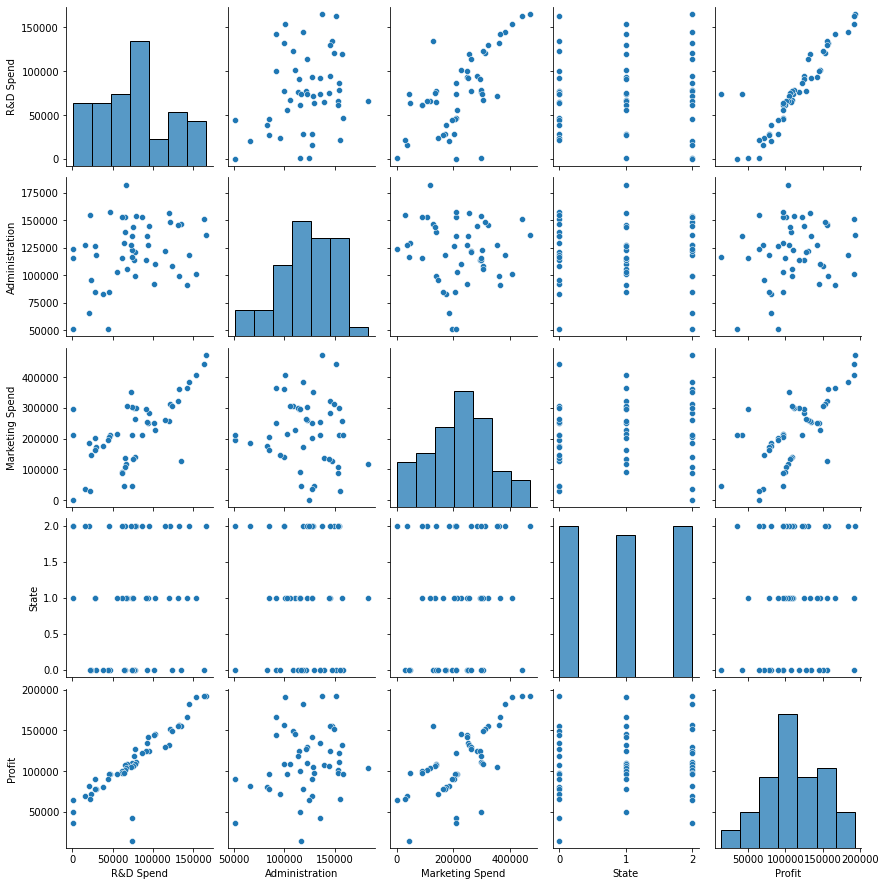

In [ ]:
dataset = pd.read_csv('StartUpProfits2.csv')
sns.pairplot(dataset)



this plot can shows the relation between each columns. the lighter the color the more connections between those data.

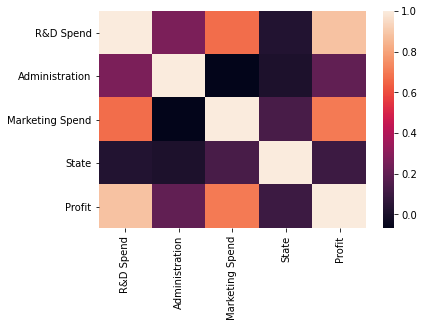

In [ ]:
#visualizing
sns.heatmap(dataset.corr())

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0 )


whenever we want to predict the data we have 2 sets. Training set and test set that problem asked us to use 80 percent of data for training. 

[101163.32819625 122243.79159912 126430.62892605  70601.00652337
 173747.83681924 122509.09928583  68745.18091971  95719.91122244
 115816.78800215 161953.38690454]
score is
0.8638555078968847


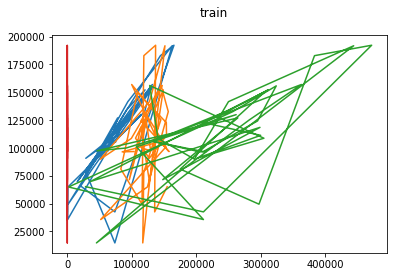

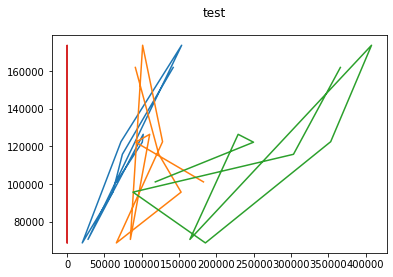

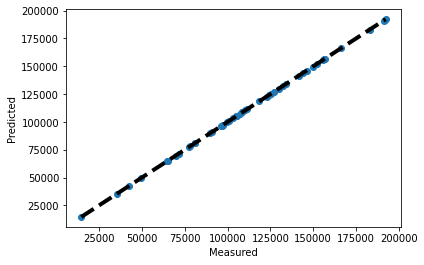

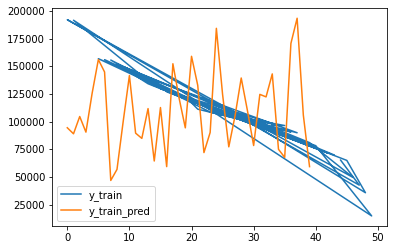

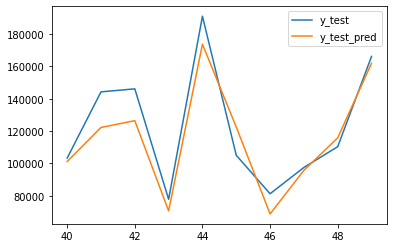

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_tpred = regressor.predict(X_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("score is")
print(score)
plt.plot(X_train,y_train)
plt.suptitle('train')
plt.show()
plt.plot(X_test,y_pred)
plt.suptitle('test')
plt.show()
from sklearn.model_selection import cross_val_predict
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regressor, dataset, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



plt.plot(y_train)
plt.plot(y_tpred)
plt.legend(['y_train','y_train_pred'])
plt.show()
plt.plot(np.arange(len(y_pred)) + len(y_train),y_test)
plt.plot(np.arange(len(y_pred)) + len(y_train), y_pred)
plt.legend(['y_test', 'y_test_pred'])
plt.show()


We want to use the statistical model to predict the relationship between independent and dependent variables in multiple linear regression. our profit is the dependant value and R&D spend, Administration, Marketing Spend, State are independent variables(our features).we use LinearRegression and predict based on test data.We calculate the r square value which is so near to 1 and so it is a good model for this dataset.
